In [160]:
import pandas as pd
import copy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
from scipy.interpolate import make_interp_spline

In [34]:
df_copy = pd.read_csv("Wildfire_Dataset.csv")

C:\Users\erikw\AppData\Local\Temp\ipykernel_10124\3328195843.py:1: DtypeWarning: Columns (7,8,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv("Wildfire_Dataset.csv")


In [35]:
df = copy.deepcopy(df_copy)
df.drop(["Unnamed: 0", "FIPS_CODE"], axis=1, inplace=True)
df.drop("NWCG_CAUSE_AGE_CATEGORY", inplace=True, axis=1)

In [36]:
columns = {'FIRE_YEAR': "year",
       'DISCOVERY_DATE': "discovery_date", 'DISCOVERY_DOY': "discovery_doy", 'DISCOVERY_TIME': "discovery_time",
       'NWCG_CAUSE_CLASSIFICATION': "cause_class", 'NWCG_GENERAL_CAUSE': "cause_description",
       'NWCG_CAUSE_AGE_CATEGORY': "cause_age", 'CONT_DATE': "contained_date", 'CONT_DOY': "contained_doy", 'CONT_TIME': "contained_time",
       'FIRE_SIZE': "size", 'FIRE_SIZE_CLASS': "size_class", 'LATITUDE': "latitude", 'LONGITUDE': "longitude", 
       'STATE': "state", 'COUNTY': "county", 'FIPS_CODE': "fips_code", 'FIPS_NAME': "fips_name"}

df.rename(mapper= lambda column: columns[column] if column in columns.keys() else column, axis=1, inplace=True)

df["discovery_month"] = df["discovery_date"].apply(lambda date: int(date.split("/")[0]))
df["discovery_day"] = df["discovery_date"].apply(lambda date: int(date.split("/")[1]))


def calc_duration(series: pd.Series):
     if any(math.isnan(x) if (type(x) is not str) else False for x in [series["contained_doy"], series ["discovery_doy"], series["contained_date"], series["year"], series["contained_time"], series["discovery_time"]]):
          return None
     return series["contained_doy"] - series["discovery_doy"] + (int(series["contained_date"].split("/")[-1]) - series["year"]) * 365 + (int(series['contained_time']/100) - int(series['discovery_time']/100))/24

df["duration"] = df.apply(func= calc_duration, axis=1)
df["size"] = df["size"] * 0.404686

In [194]:
df

,year,discovery_date,discovery_doy,discovery_time,cause_class,cause_description,contained_date,contained_doy,contained_time,size,size_class,latitude,longitude,state,county,fips_name,discovery_month,discovery_day,duration
1656611,2013,12/18/2013,352,NaN,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,0.000004,A,44.997000,-101.233300,SD,Dewey,Dewey County,12,18,NaN
571841,2004,5/12/2004,133,1521.0,Human,Misuse of fire by a minor,5/12/2004,133.0,1531.0,0.000036,A,40.952110,-78.220390,PA,Clearfield,Clearfield County,5,12,0.000000
537776,2008,7/16/2008,198,1351.0,Human,Power generation/transmission/distribution,7/16/2008,198.0,1512.0,0.000040,A,41.205460,-96.786640,NE,NaN,NaN,7,16,0.083333
1988188,2017,10/16/2017,289,NaN,Human,Equipment and vehicle use,NaN,NaN,NaN,0.000040,A,43.875600,-99.737400,SD,Lyman,Lyman County,10,16,NaN
1751218,2014,3/13/2014,72,1651.0,Human,Debris and open burning,3/13/2014,72.0,1715.0,0.000040,A,40.881070,-97.591160,NE,NaN,NaN,3,13,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458490,2011,5/29/2011,149,1500.0,Human,Recreation and ceremony,7/12/2011,193.0,1200.0,217740.897614,G,33.606111,-109.449722,AZ,NaN,NaN,5,29,43.875000
1578390,2012,7/8/2012,190,1800.0,Natural,Natural,7/30/2012,212.0,830.0,225895.037234,G,42.391894,-117.893687,OR,Malheur,Malheur County,7,8,21.583333
2284521,2020,8/16/2020,229,NaN,Natural,Natural,11/11/2020,316.0,NaN,238508.978448,G,39.765255,-122.672914,CA,Glenn,Glenn County,8,16,NaN
211267,1997,6/25/1997,176,1841.0,Natural,Natural,9/9/1997,252.0,1215.0,245622.144270,G,61.982700,-157.085700,AK,NaN,NaN,6,25,75.750000


In [37]:
# Topic: How climate change affects wildfires in the USA

  

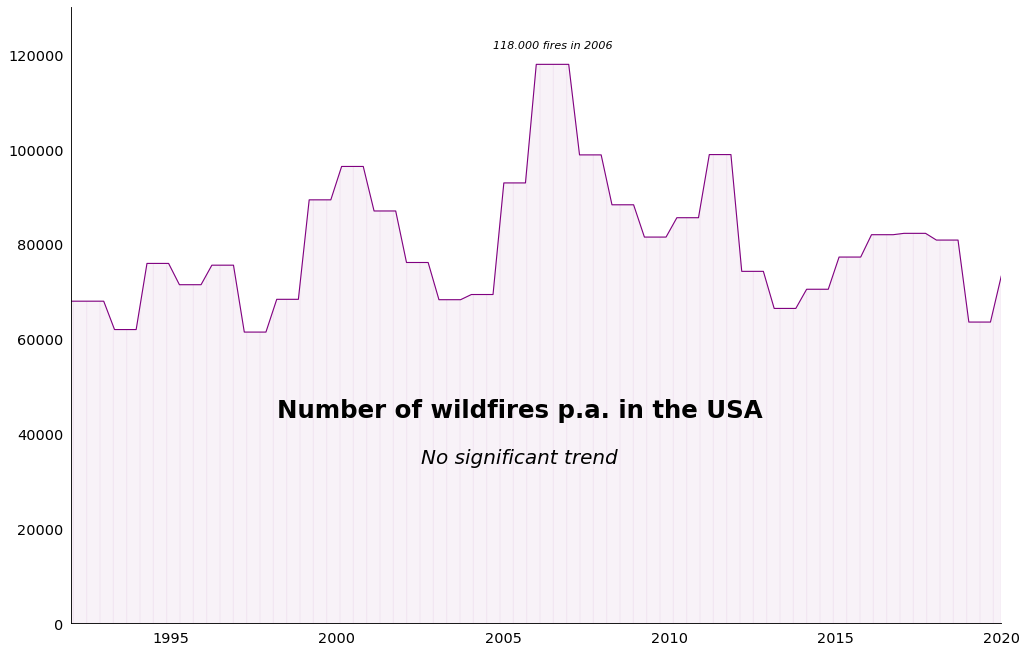

In [38]:
df_ = df.groupby("year").size()

x_new = np.linspace(1992, 2020, 87)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10), dpi=80)

ax.annotate("Number of wildfires p.a. in the USA", xy=(2005.5, 45_000), xycoords='data', color="black", fontsize=22, ha='center', va='center', fontweight = "bold")
ax.annotate("No significant trend", xy=(2005.5, 35_000), xycoords='data', color="black", fontsize=18, ha='center', va='center', fontstyle = "oblique")
ax.annotate("118.000 fires in 2006", xy=(2006.5, 122_000), xycoords='data', color="black", fontsize=10, ha='center', va='center', fontstyle = "oblique")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)

ax.set_ylim([0, 130_000])
ax.set_xlim([1992, 2020])
ax.fill_between(x_new, y_smooth, color="Purple", alpha=0.05, hatch="|")

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.plot(x_new, y_smooth, color="Purple", markersize=8, linewidth=1)


C:\Users\erikw\AppData\Local\Temp\ipykernel_10124\682548512.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0", "1.000.000", "2.000.000", "3.000.000", "4.000.000", "5.000.000",], fontsize=11)


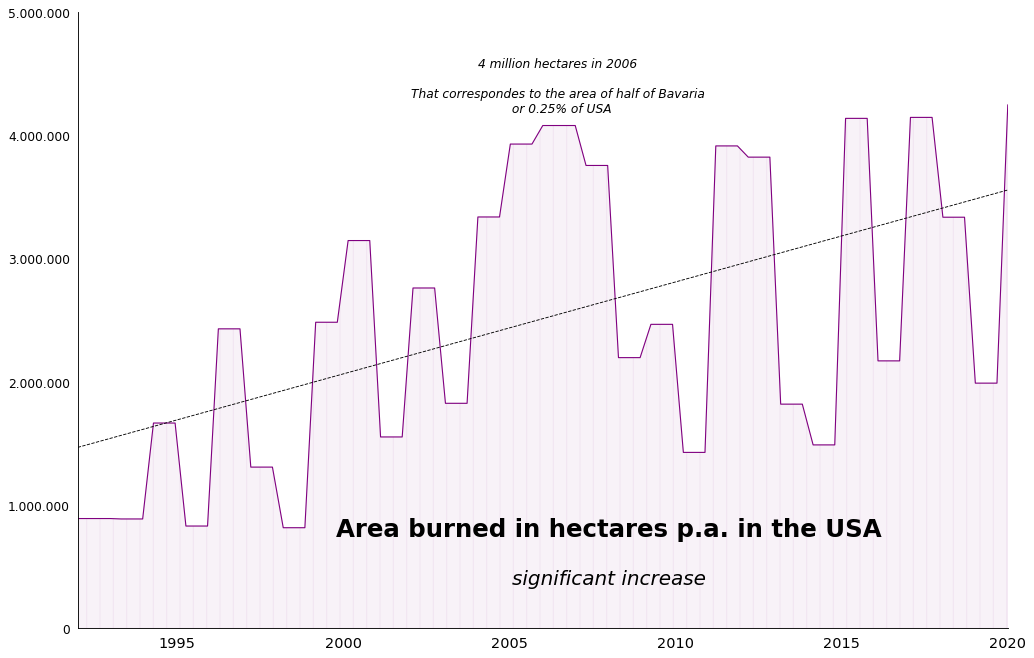

In [109]:
df_ = df.groupby("year")["size"].sum()

x_new = np.linspace(1992, 2020, 87)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10), dpi=80)

df_rolling = df_.rolling(window=5).mean().dropna()  # Drop NaN values resulted from rolling
avg_x_new = np.linspace(df_rolling.index.min(), df_rolling.index.max(), 300)  # More points for smoother curve
spl = make_interp_spline(df_rolling.index, df_rolling, k=2)
avg_y_smooth = spl(avg_x_new)


coefficients = np.polyfit(df_.index, df_.values, 1)
linear_regression = np.poly1d(coefficients)
regression_y = linear_regression(df_.index)


ax.annotate("Area burned in hectares p.a. in the USA", xy=(2008, 800_000), xycoords='data', color="black", fontsize=22, ha='center', va='center', fontweight = "bold")
ax.annotate("significant increase", xy=(2008, 400_000), xycoords='data', color="black", fontsize=18, ha='center', va='center', fontstyle = "oblique")
ax.annotate("4 million hectares in 2006 \n\nThat correspondes to the area of half of Bavaria \n or 0.25% of USA", xy=(2006.5, 4_400_000), xycoords='data', color="black", fontsize=11, ha='center', va='center', fontstyle = "oblique")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)

ax.set_ylim([0, 5_000_000])
ax.set_xlim([1992, 2020])
ax.fill_between(x_new, y_smooth, color="Purple", alpha=0.05, hatch="|")

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_yticklabels(["0", "1.000.000", "2.000.000", "3.000.000", "4.000.000", "5.000.000",], fontsize=11)

ax.plot(x_new, y_smooth, color="Purple", markersize=8, linewidth=1)
ax.plot(df_.index, regression_y, label='5-Year Average', color='black', linestyle='--', linewidth=0.8)

In [40]:
df_.values[:4:]

array([ 890277.84938027,  886904.57789606, 1665518.55848741,
        829425.46929839])

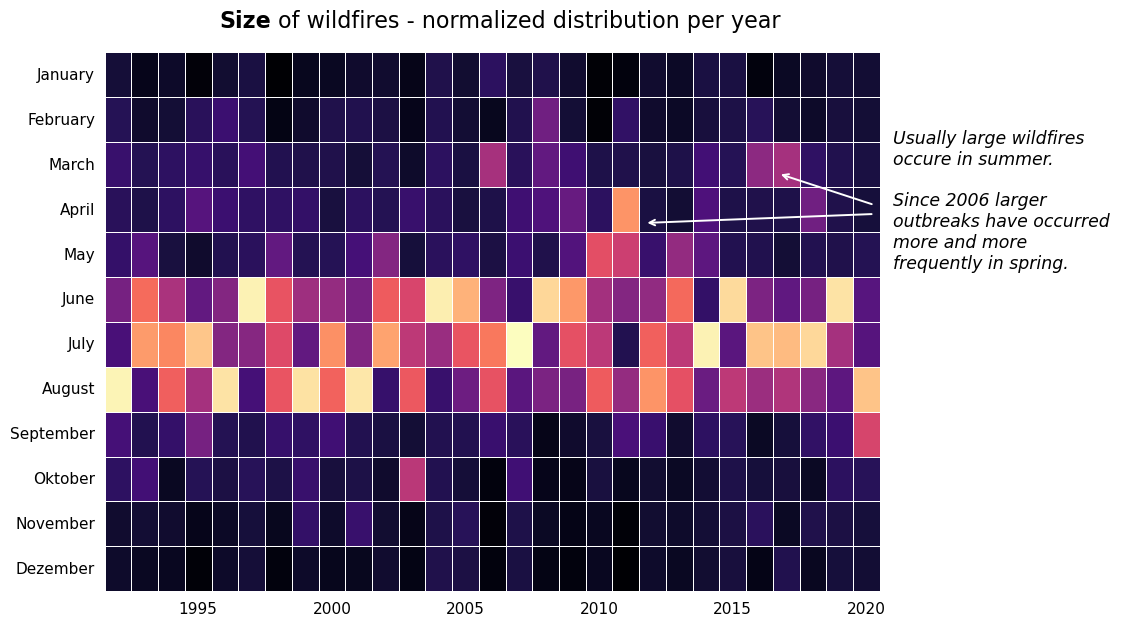

In [41]:
# Eriks Code

pivot_table = df.pivot_table(values="size", index='discovery_month', columns='year', aggfunc="sum", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.5 , y=3.3, s="Usually large wildfires \noccure in summer. \n\nSince 2006 larger \noutbreaks have occurred \nmore and more \nfrequently in spring.", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=4.3 , y=-0.7, s="Size", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=6.5 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

plt.annotate("", xy=(20.2, 3.8), xytext=(28.8, 3.6), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))
plt.annotate("", xy=(25.2, 2.7), xytext=(28.8, 3.4), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation = 0)

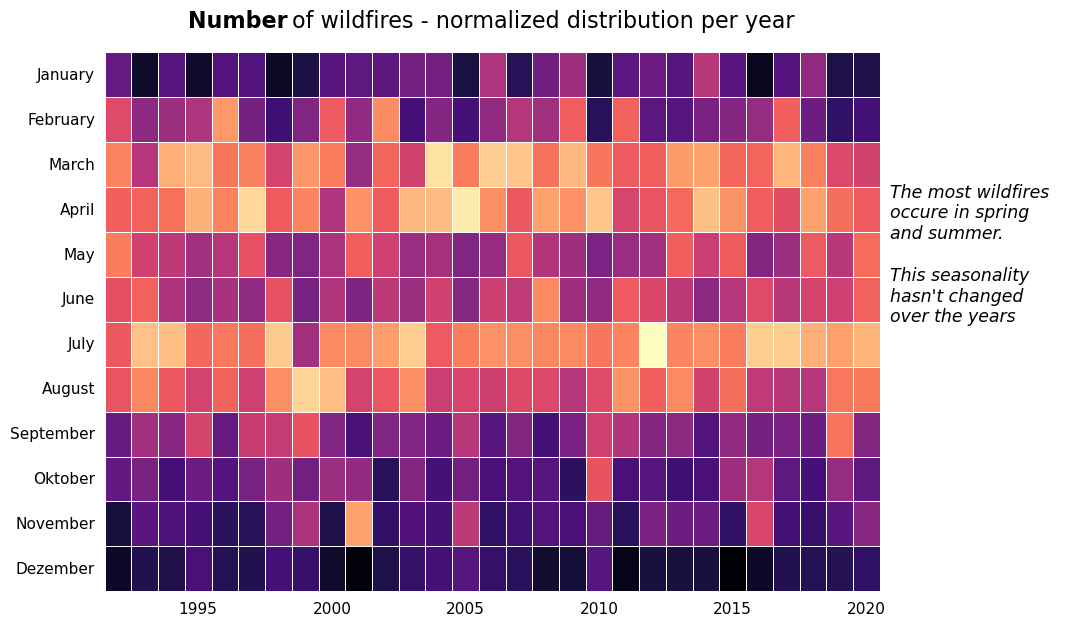

In [42]:
pivot_table = df.pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=3.1 , y=-0.7, s="Number", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)



In [ ]:
# Why this shape?

# -> The western United States has a different wildfire season than the eastern United States

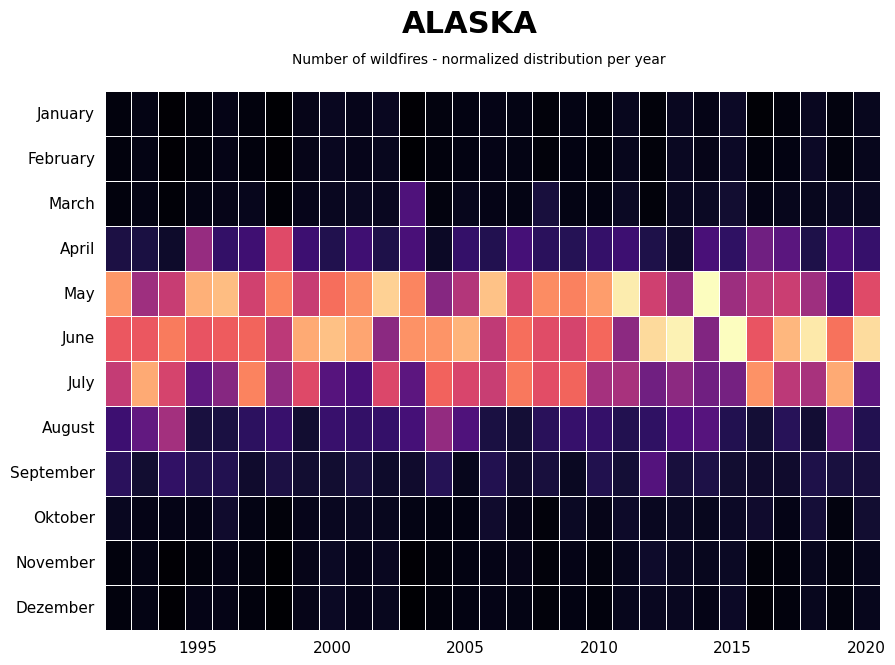

In [140]:
pivot_table = df[df["state"] == "AK"].pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

#plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=11.1 , y=-1.5, s="ALASKA", fontsize=22, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="Number of wildfires - normalized distribution per year", fontsize=10, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)

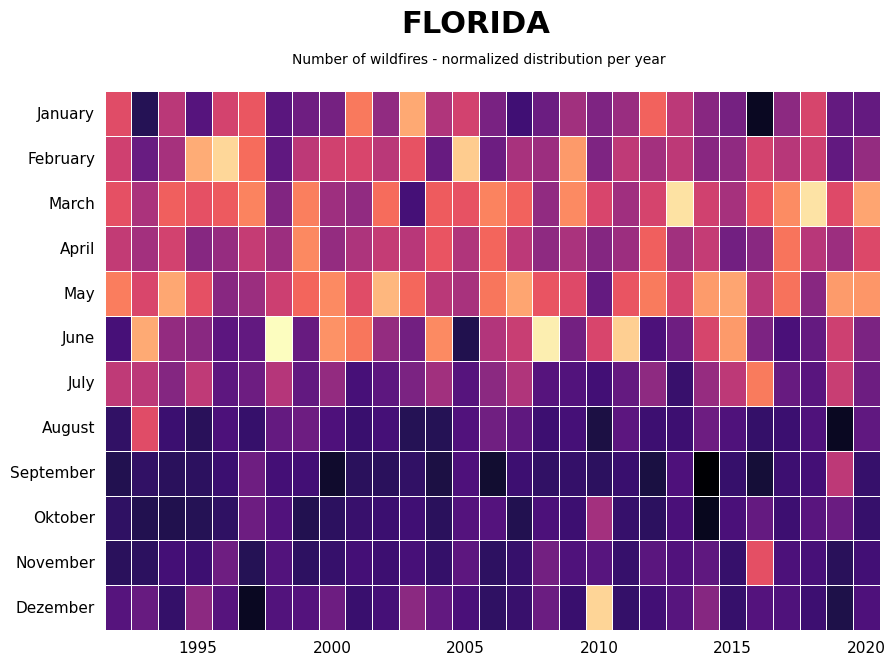

In [137]:
pivot_table = df[df["state"] == "FL"].pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

#plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=11.1 , y=-1.5, s="FLORIDA", fontsize=22, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="Number of wildfires - normalized distribution per year", fontsize=10, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)

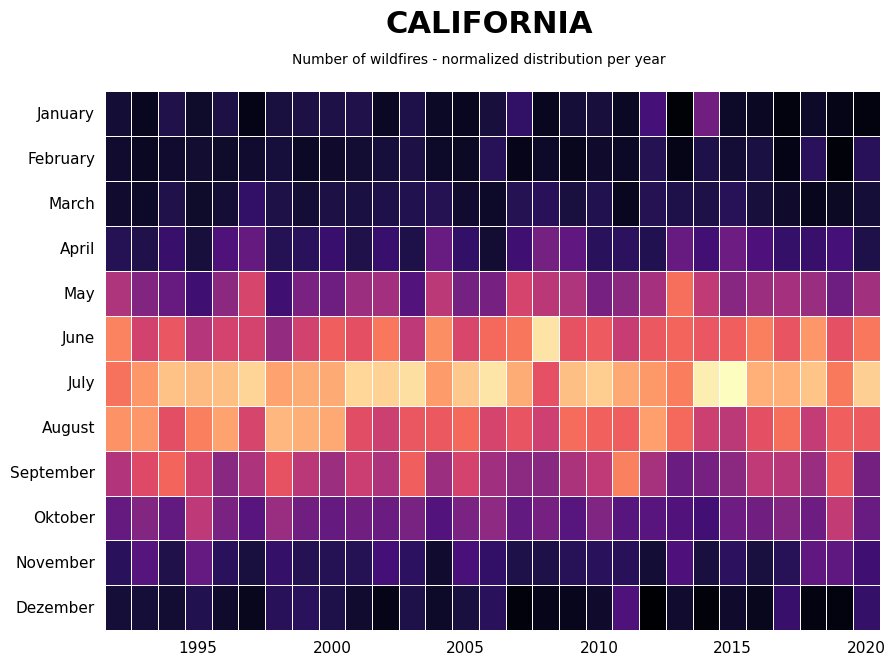

In [141]:
pivot_table = df[df["state"] == "CA"].pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

#plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=10.5 , y=-1.5, s="CALIFORNIA", fontsize=22, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="Number of wildfires - normalized distribution per year", fontsize=10, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)

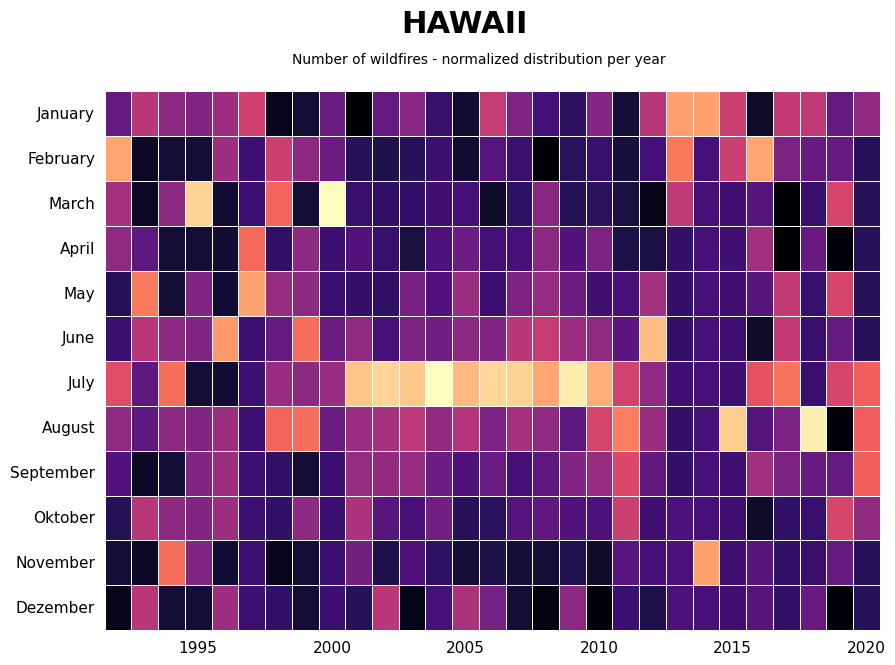

In [169]:
pivot_table = df[df["state"] == "HI"].pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

#plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=11.1 , y=-1.5, s="HAWAII", fontsize=22, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="Number of wildfires - normalized distribution per year", fontsize=10, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)

In [43]:
# Christophs Code

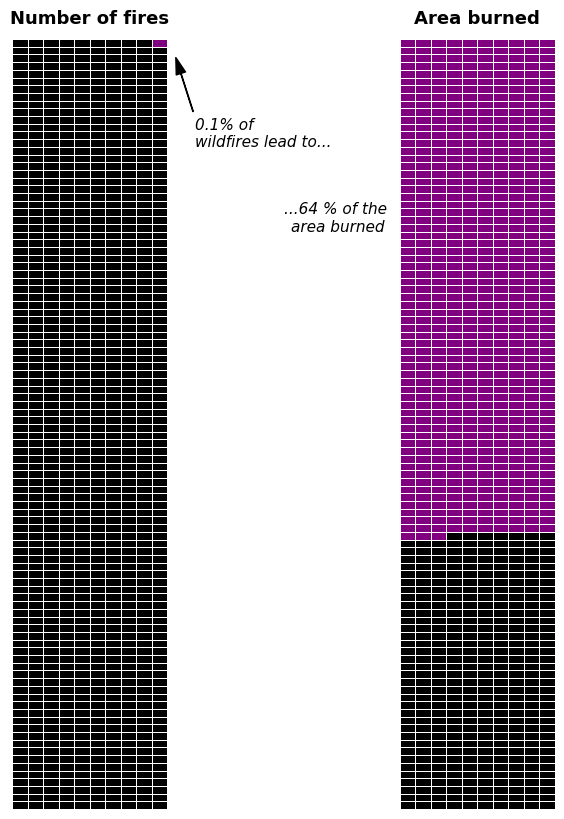

In [44]:
# Analyse der Größenverteilung 

df_ = df
df_.sort_values(by="size", inplace=True)
BOUNDARY = 0.999
percentage_size = 100*round(df_.iloc[int(BOUNDARY*len(df_)) : len(df_)]["size"].sum() / df_["size"].sum(), 3)
array_number = np.zeros((100, 10))
array_number[0:1, 9] = 1

array_size = np.zeros((100, 10))
array_size[0:int(percentage_size), ::] = 1
array_size[int(percentage_size), 0:int(10*round(percentage_size%1, 2))] = 1


colors = ["black", "purple"]
cmap = sns.color_palette(colors, as_cmap=True)

fig, ax = plt.subplots(1, 2, figsize=(7, 10), gridspec_kw={'hspace': 0, 'wspace': 1.5})
sns.heatmap(array_number, ax=ax[0], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)
sns.heatmap(array_size, ax=ax[1], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)

ax[0].annotate('0.1% of \nwildfires lead to...',
               xy=(1.05, 0.98), xycoords='axes fraction',
               xytext=(1.18, 0.86), textcoords='axes fraction',
               ha='left', fontsize=11, fontstyle="italic", color='black',
               arrowprops=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=7))
ax[1].annotate('...64 % of the \narea burned', xy=(-0.4, 0.75), xycoords='axes fraction', ha='center', fontsize=11, fontstyle="italic", color='black')

ax[0].annotate('Number of fires', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")
ax[1].annotate('Area burned', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")

for i in range(2):
    ax[i].tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=False, labelleft= False, rotation= 0)

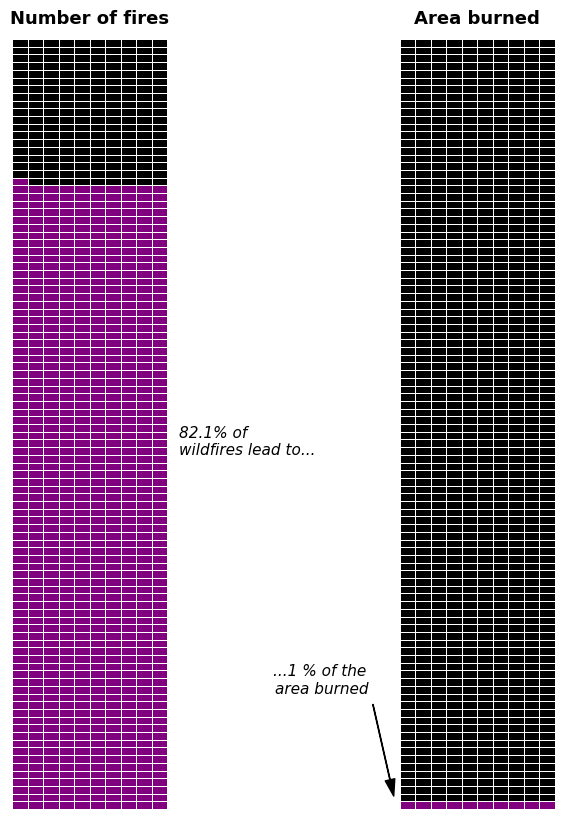

In [45]:
df_ = df
df_.sort_values(by="size", inplace=True)
BOUNDARY = 0.821
percentage_size = 100*round(df_.iloc[0 : int(BOUNDARY*len(df_))]["size"].sum() / df_["size"].sum(), 4)
array_number = np.zeros((100, 10))
array_number[100-int(BOUNDARY*100)+1:100, ::] = 1
array_number[100-int(BOUNDARY*100), :1:] = 1

array_size = np.zeros((100, 10))
array_size[99, ::] = 1


colors = ["black", "purple"]
cmap = sns.color_palette(colors, as_cmap=True)

fig, ax = plt.subplots(1, 2, figsize=(7, 10), gridspec_kw={'hspace': 0, 'wspace': 1.5})
sns.heatmap(array_number, ax=ax[0], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)
sns.heatmap(array_size, ax=ax[1], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)

ax[0].annotate('82.1% of \nwildfires lead to...',
               xy=(1.05, 0.98), xycoords='axes fraction',
               xytext=(1.08, 0.46), textcoords='axes fraction',
               ha='left', fontsize=11, fontstyle="italic", color='black')
               
ax[1].annotate('...1 % of the \narea burned', xy=(-0.03, 0.01), xytext=(-0.5, 0.15), xycoords='axes fraction', ha='center', fontsize=11, fontstyle="italic", color='black', arrowprops=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=7))

ax[0].annotate('Number of fires', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")
ax[1].annotate('Area burned', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")

for i in range(2):
    ax[i].tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=False, labelleft= False, rotation= 0)

In [46]:
df_ = df
df_.sort_values(by="size", inplace=True)
BOUNDARY = 0.821
100*round(df_.iloc[0 : int(BOUNDARY*len(df_))]["size"].sum() / df_["size"].sum(), 8)

1.004054

-> Its not about how many wildfires occure. Its about how many break through uncontrollably.

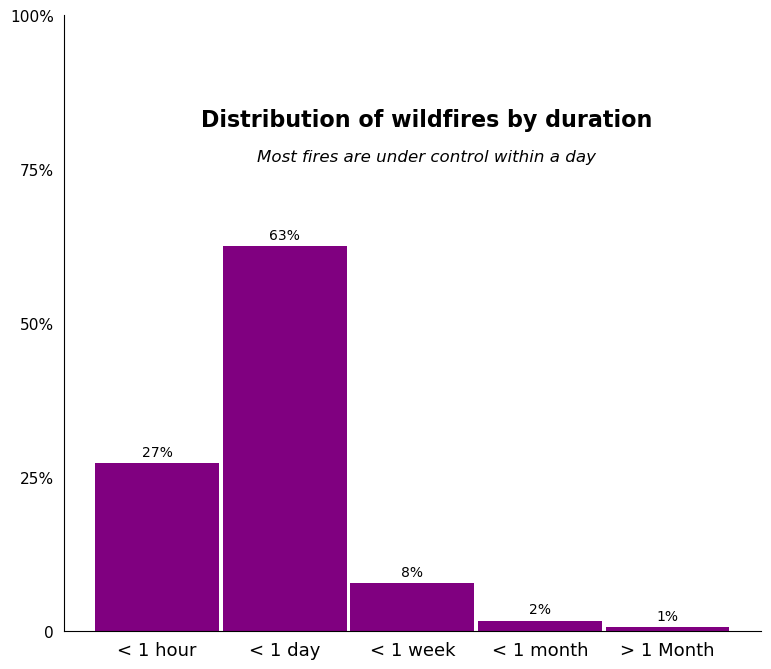

In [47]:
branddauern = list(df.duration[df.duration.notna()])

# Branddauern in Kategorien einteilen
kategorien = ['< 1 hour', '< 1 day', '< 1 week', '< 1 month', '> 1 Month']
kategorien_counts = [0] * len(kategorien)

for dauer in branddauern:
    if dauer <= 0.041:
        kategorien_counts[0] += 1
    elif dauer <= 1:
        kategorien_counts[1] += 1
    elif dauer <= 7:
        kategorien_counts[2] += 1
    elif dauer <= 30:
        kategorien_counts[3] += 1
    else:
        kategorien_counts[4] += 1

kategorien_counts = [i/sum(kategorien_counts) for i in kategorien_counts]


# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(9, 8))
bars = ax.bar(kategorien, kategorien_counts, width= 0.97, color='purple')

ax.annotate('Distribution of wildfires by duration', xy=(0.52, 0.82), xycoords='axes fraction', ha='center', fontsize=16, color='black', fontweight="bold")
ax.annotate("Most fires are under control within a day", xy=(0.52, 0.77), xycoords='axes fraction', color="black", fontsize=12, ha='center', va='center', fontstyle = "italic")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=11)

# Werte über den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{round(height * 100)}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')
    
plt.show()


In [48]:
df

,year,discovery_date,discovery_doy,discovery_time,cause_class,cause_description,contained_date,contained_doy,contained_time,size,size_class,latitude,longitude,state,county,fips_name,discovery_month,discovery_day,duration
1656611,2013,12/18/2013,352,NaN,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,0.000004,A,44.997000,-101.233300,SD,Dewey,Dewey County,12,18,NaN
571841,2004,5/12/2004,133,1521.0,Human,Misuse of fire by a minor,5/12/2004,133.0,1531.0,0.000036,A,40.952110,-78.220390,PA,Clearfield,Clearfield County,5,12,0.000000
537776,2008,7/16/2008,198,1351.0,Human,Power generation/transmission/distribution,7/16/2008,198.0,1512.0,0.000040,A,41.205460,-96.786640,NE,NaN,NaN,7,16,0.083333
1988188,2017,10/16/2017,289,NaN,Human,Equipment and vehicle use,NaN,NaN,NaN,0.000040,A,43.875600,-99.737400,SD,Lyman,Lyman County,10,16,NaN
1751218,2014,3/13/2014,72,1651.0,Human,Debris and open burning,3/13/2014,72.0,1715.0,0.000040,A,40.881070,-97.591160,NE,NaN,NaN,3,13,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458490,2011,5/29/2011,149,1500.0,Human,Recreation and ceremony,7/12/2011,193.0,1200.0,217740.897614,G,33.606111,-109.449722,AZ,NaN,NaN,5,29,43.875000
1578390,2012,7/8/2012,190,1800.0,Natural,Natural,7/30/2012,212.0,830.0,225895.037234,G,42.391894,-117.893687,OR,Malheur,Malheur County,7,8,21.583333
2284521,2020,8/16/2020,229,NaN,Natural,Natural,11/11/2020,316.0,NaN,238508.978448,G,39.765255,-122.672914,CA,Glenn,Glenn County,8,16,NaN
211267,1997,6/25/1997,176,1841.0,Natural,Natural,9/9/1997,252.0,1215.0,245622.144270,G,61.982700,-157.085700,AK,NaN,NaN,6,25,75.750000


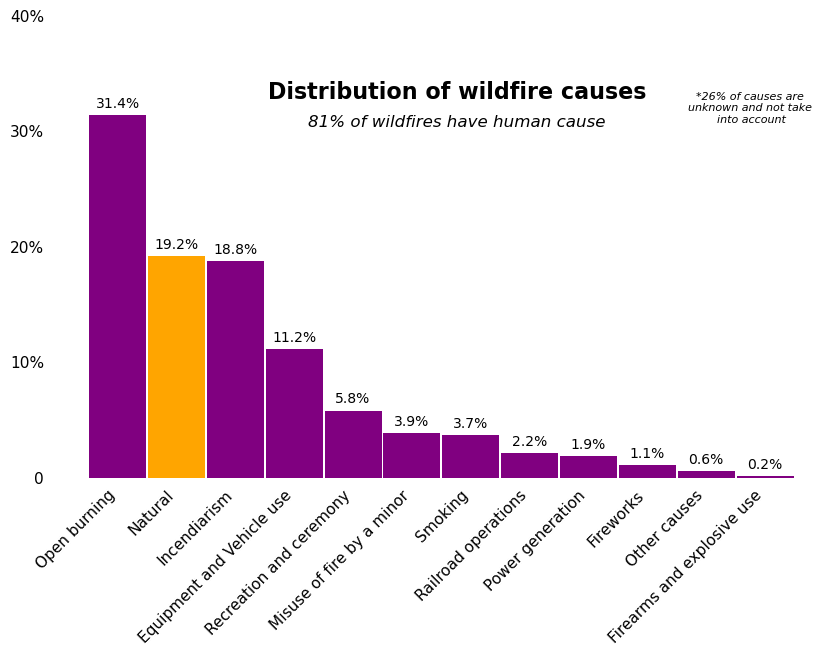

In [107]:
#Christophs Code

cause_counts = df[df['cause_description'] != "Missing data/not specified/undetermined"]["cause_description"].value_counts()
cause_count_list = list(cause_counts.values)
cause_count_list = [count/sum(cause_count_list) for count in cause_count_list]

colors = ['purple'] * len(cause_count_list)
colors[1] = 'orange'


fig, ax = plt.subplots(figsize = (10, 6))
bars = ax.bar(cause_counts.index, cause_count_list, width= 0.97, color=colors)

#ax.set_xlabel('Cause', fontsize = 14, fontweight = 'bold', labelpad = 20)
#ax.set_ylabel('Häufigkeit', fontsize = 14, fontweight = 'bold', labelpad = 20)



new_labels = ['Open burning', 'Natural', 'Incendiarism', 'Equipment and Vehicle use', 'Recreation and ceremony', 'Misuse of fire by a minor', 'Smoking', 'Railroad operations', 'Power generation', 'Fireworks', 'Other causes', 'Firearms and explosive use']
ax.set_xticks(range(len(new_labels)))
ax.set_xticklabels(new_labels, rotation = 45, ha = 'right', fontsize = 9)
ax.tick_params(axis = 'y', labelsize = 9)

#yticks = ax.get_yticks()
#new_yticks = [yticks[0], yticks[3], yticks[-2]]  # Nur den 3. und letzten Wert nehmen
#new_y_labels = [f'{int(new_yticks[0])}', f'{int(new_yticks[1])}', f'{int(new_yticks[-1])}']
#ax.set_yticks(new_yticks)
#ax.set_yticklabels(new_y_labels, fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(np.linspace(0, 0.4, 5))
ax.set_yticklabels(["0", "10%", "20%", "30%", "40%"], fontsize=11)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=11)


ax.annotate('Distribution of wildfire causes', xy=(0.52, 0.82), xycoords='axes fraction', ha='center', fontsize=16, color='black', fontweight="bold")
ax.annotate("81% of wildfires have human cause", xy=(0.52, 0.77), xycoords='axes fraction', color="black", fontsize=12, ha='center', va='center', fontstyle = "italic")
ax.annotate("*26% of causes are \nunknown and not take \ninto account", xy=(0.9, 0.8), xycoords='axes fraction', color="black", fontsize=8, ha='center', va='center', fontstyle = "italic")

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{round(height * 100, 1)}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')


plt.show()

In [191]:
pd.read_csv("weather_data/newyorkcity.csv")

,NAME,Airport,year,yrMonth,serMonth,PRCP,TAVG,TMAX,TMIN
0,"New York City, NY US",LGA,1940,1,1,2.44,24.9,30.4,19.3
1,"New York City, NY US",LGA,1940,2,2,2.72,31.9,37.6,26.2
2,"New York City, NY US",LGA,1940,3,3,4.80,34.1,39.7,28.4
3,"New York City, NY US",LGA,1940,4,4,5.57,46.2,53.7,38.7
4,"New York City, NY US",LGA,1940,5,5,5.35,59.4,67.2,51.5
...,...,...,...,...,...,...,...,...,...
967,"New York City, NY US",LGA,2020,8,968,4.90,79.7,86.2,73.2
968,"New York City, NY US",LGA,2020,9,969,4.17,71.1,77.3,64.8
969,"New York City, NY US",LGA,2020,10,970,5.17,59.9,65.7,54.2
970,"New York City, NY US",LGA,2020,11,971,4.42,54.3,61.4,47.2


Korrelation zwischen Temperatur und Waldbrandgröße: 0.5375103081701186


<Axes: xlabel='temperature', ylabel='size'>

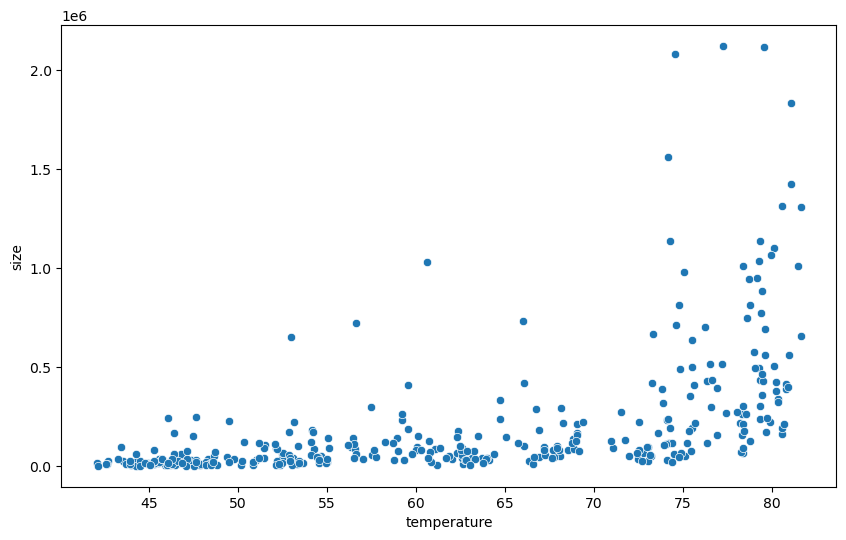

In [209]:
wes = [pd.read_csv("weather_data/newyorkcity.csv"), pd.read_csv("weather_data/atlanta.csv"), pd.read_csv("weather_data/houston.csv"), pd.read_csv("weather_data/losangeles.csv"), pd.read_csv("weather_data/oklahomacity.csv"), pd.read_csv("weather_data/phoenix.csv"), pd.read_csv("weather_data/saltlakecity.csv"), pd.read_csv("weather_data/seattle.csv")]

merged_df = pd.concat(wes).groupby(["year", "yrMonth"]).agg({'TAVG': 'mean'}).reset_index()
merged_df["month"] = merged_df["yrMonth"]
merged_df["temperature"] = merged_df["TAVG"]
merged_df = merged_df[["year", "month", "temperature"]]
merged_df = merged_df[merged_df["year"] >= 1991]

df_temp = pd.DataFrame(df.groupby(["year", "discovery_month"])["size"].sum()).reset_index()
df_temp["month"] = df_temp["discovery_month"]
df_temp = df_temp[["year", "month", "size"]]

df_merged = pd.merge(merged_df, df_temp, on=['year', "month"])




correlation = df_merged['size'].corr(df_merged['temperature'])
print(f'Korrelation zwischen Temperatur und Waldbrandgröße: {correlation}')

# Daten plotten
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='temperature', y='size')

In [210]:
df_merged

,year,month,temperature,size
0,1992,1,45.1500,1.310948e+04
1,1992,2,51.0125,3.436539e+04
2,1992,3,54.6500,5.246273e+04
3,1992,4,61.9875,3.819519e+04
4,1992,5,68.0750,5.021527e+04
...,...,...,...,...
343,2020,8,81.0750,1.834102e+06
344,2020,9,74.2625,1.137076e+06
345,2020,10,65.0625,1.456692e+05
346,2020,11,56.5000,4.182239e+04
